🔹 RQ1 (Regression):
How do temperature, fuel prices, and unemployment affect weekly sales performance?
H: Weekly sales can be predicted using a multilinear regression model with temperature, fuel price, and unemployment as predictors.

In [1]:
# For data storage and manipulation
import pandas as pd
# for numeric computations
import numpy as np

In [2]:
# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# for ML methods and algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep

In [4]:
# for serialization and deserialization of data from and to a file
import pickle

In [5]:
df = pd.read_csv("../Data/Cleaned-Walmart_Sales.csv")
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5923 non-null   int64  
 1   Date          5923 non-null   object 
 2   Weekly_Sales  5923 non-null   float64
 3   Holiday_Flag  5923 non-null   int64  
 4   Temperature   5923 non-null   float64
 5   Fuel_Price    5923 non-null   float64
 6   CPI           5923 non-null   float64
 7   Unemployment  5923 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 370.3+ KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
615,5,20-05-2011,299614.33,0,71.37,3.907,216.302385,6.489
3896,30,11-11-2011,409686.63,0,59.80,3.297,217.645539,7.441
1935,15,23-12-2011,1182691.87,0,34.93,3.587,136.588387,7.866
4025,31,05-08-2011,1428993.33,0,94.22,3.684,215.197852,7.852
246,2,10-02-2012,2103322.68,1,46.98,3.409,219.904907,7.057


In [6]:
df = df.drop(columns=['Holiday_Flag', 'Date', 'Store'])

In [7]:
######df = df.astype({col: 'float' for col in df.select_dtypes(include=['int', 'float']).columns})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  5923 non-null   float64
 1   Temperature   5923 non-null   float64
 2   Fuel_Price    5923 non-null   float64
 3   CPI           5923 non-null   float64
 4   Unemployment  5923 non-null   float64
dtypes: float64(5)
memory usage: 231.5 KB


In [9]:
df.shape

(5923, 5)

In [10]:
list(df)

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

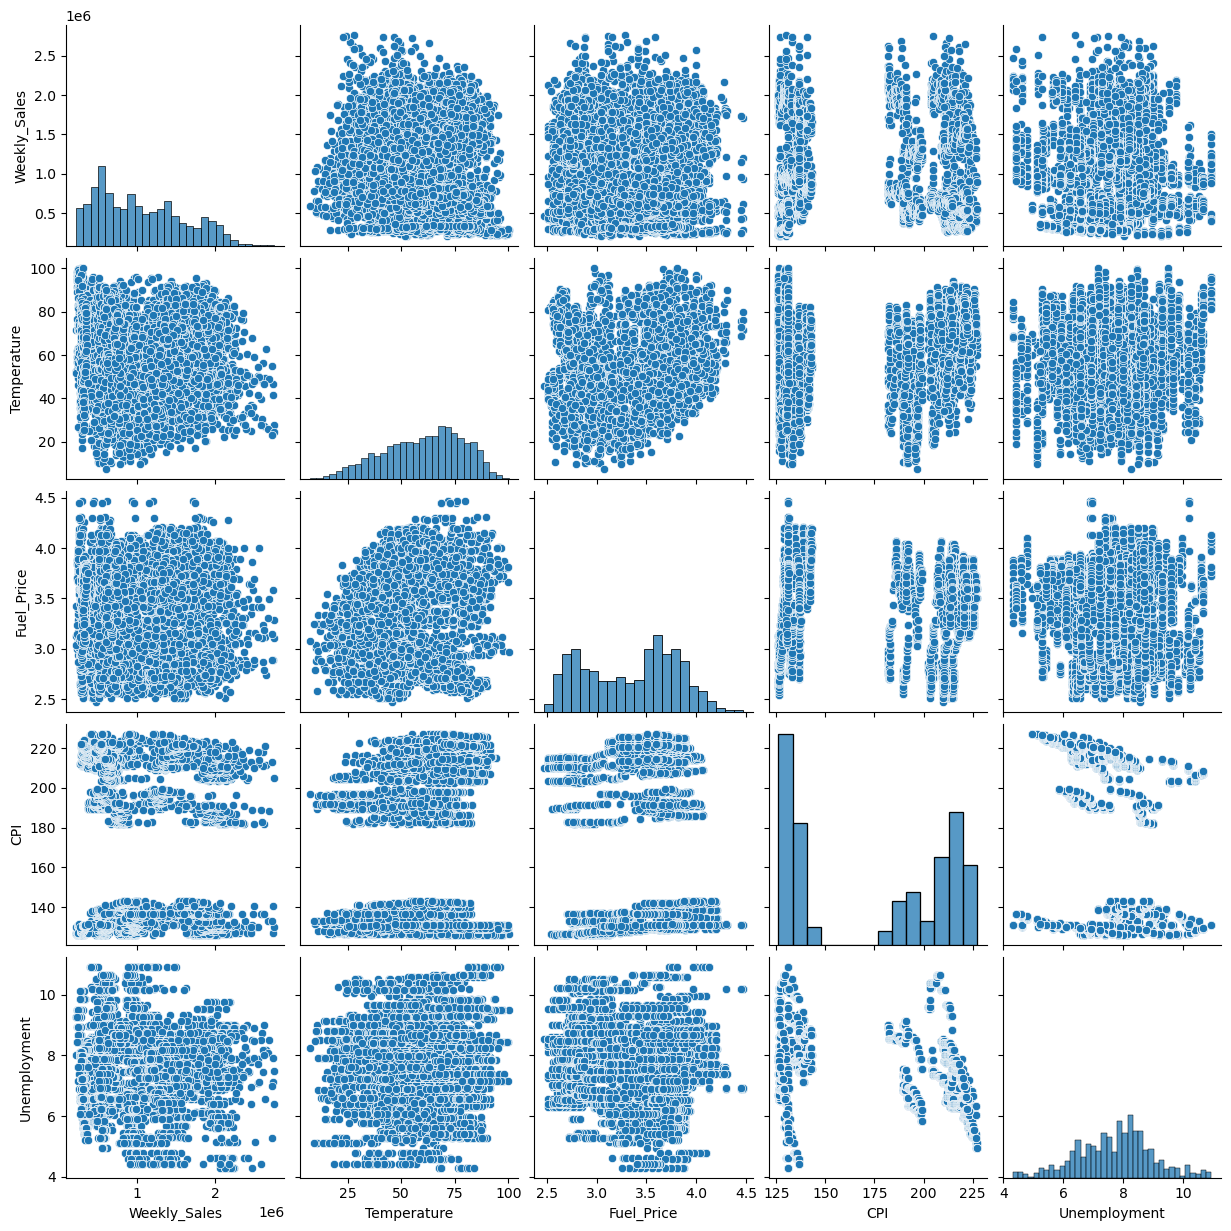

In [11]:
sns.pairplot(df)

# Show the plot
plt.show()

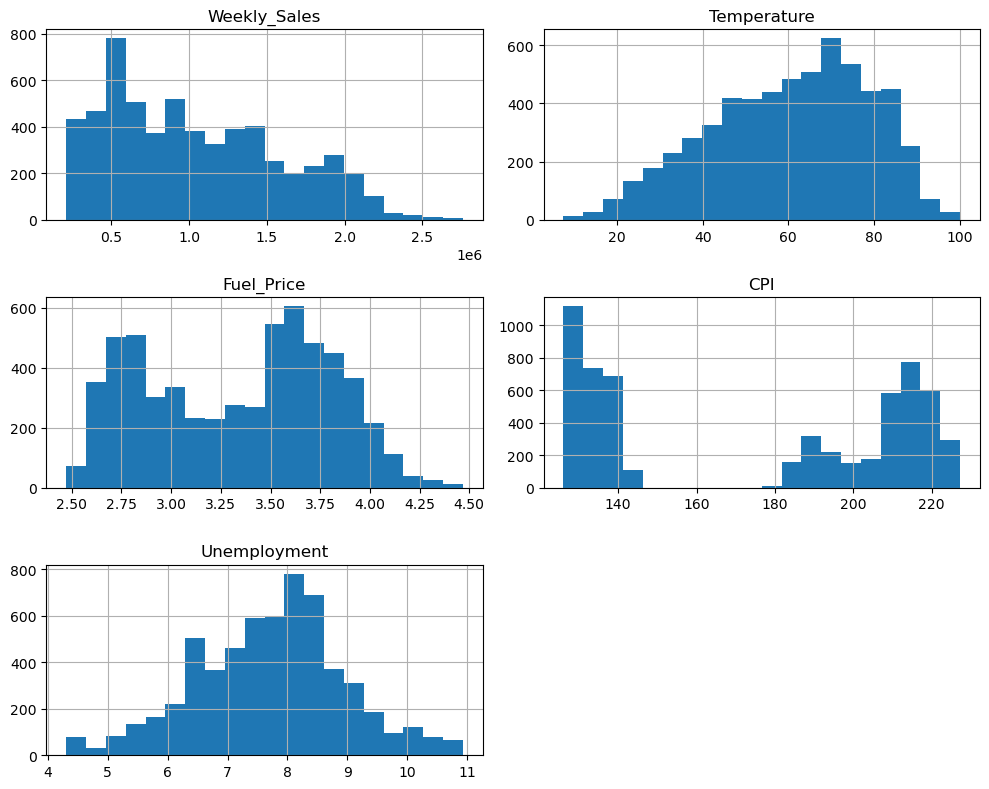

In [12]:
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

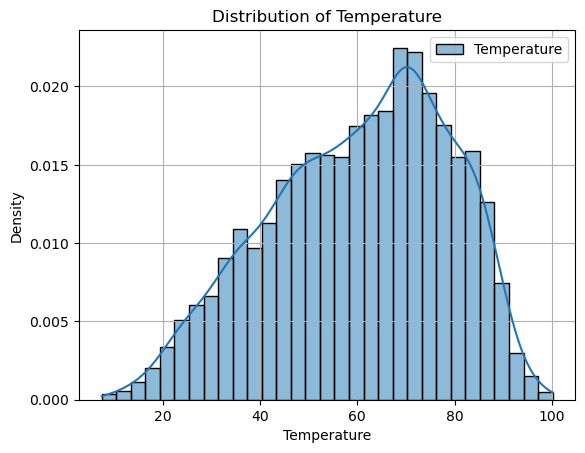

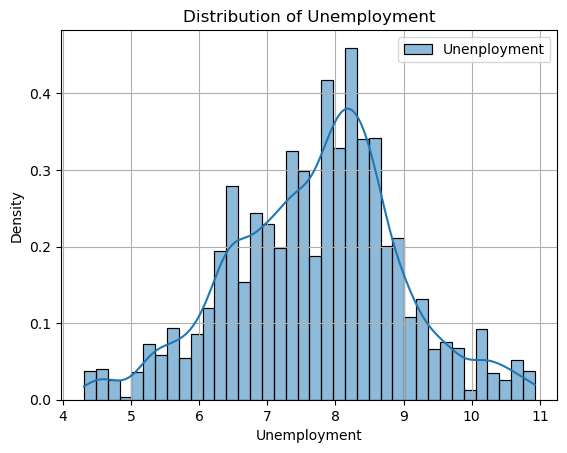

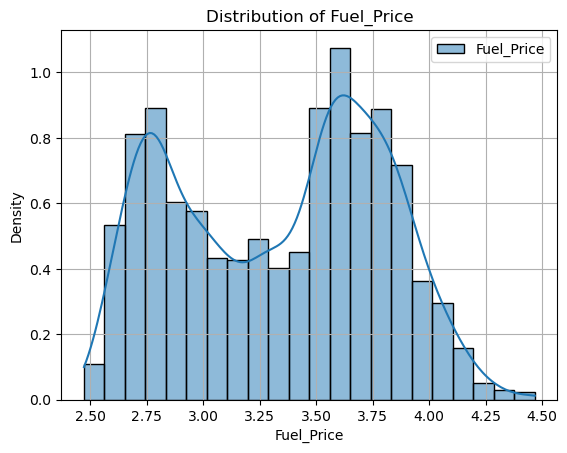

In [13]:
# Plot distribution for Temperature
sns.histplot(df['Temperature'], label='Temperature', kde=True, stat="density")
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution for Unemployment
sns.histplot(df['Unemployment'], label='Unenployment', kde=True, stat="density")
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment')
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution for Fuel_Price
sns.histplot(df['Fuel_Price'], label='Fuel_Price', kde=True, stat="density")
plt.title('Distribution of Fuel_Price')
plt.xlabel('Fuel_Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# to check null values in data
df.isnull().sum()

Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [15]:
# get idea of basic statistical parameters for each column
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,5.923000e+03,5923.000000,5923.000000,5923.000000,5923.000000
mean,1.041038e+06,60.409046,3.340349,175.005846,7.721439
std,5.543193e+05,18.397096,0.458072,39.024239,1.243295
min,2.099862e+05,7.460000,2.472000,126.064000,4.308000
25%,5.527446e+05,46.945000,2.889000,132.763355,6.891000
50%,9.478151e+05,62.590000,3.417000,190.006988,7.852000
75%,1.428915e+06,74.715000,3.720500,213.791715,8.494000
max,2.760347e+06,100.140000,4.468000,227.232807,10.926000


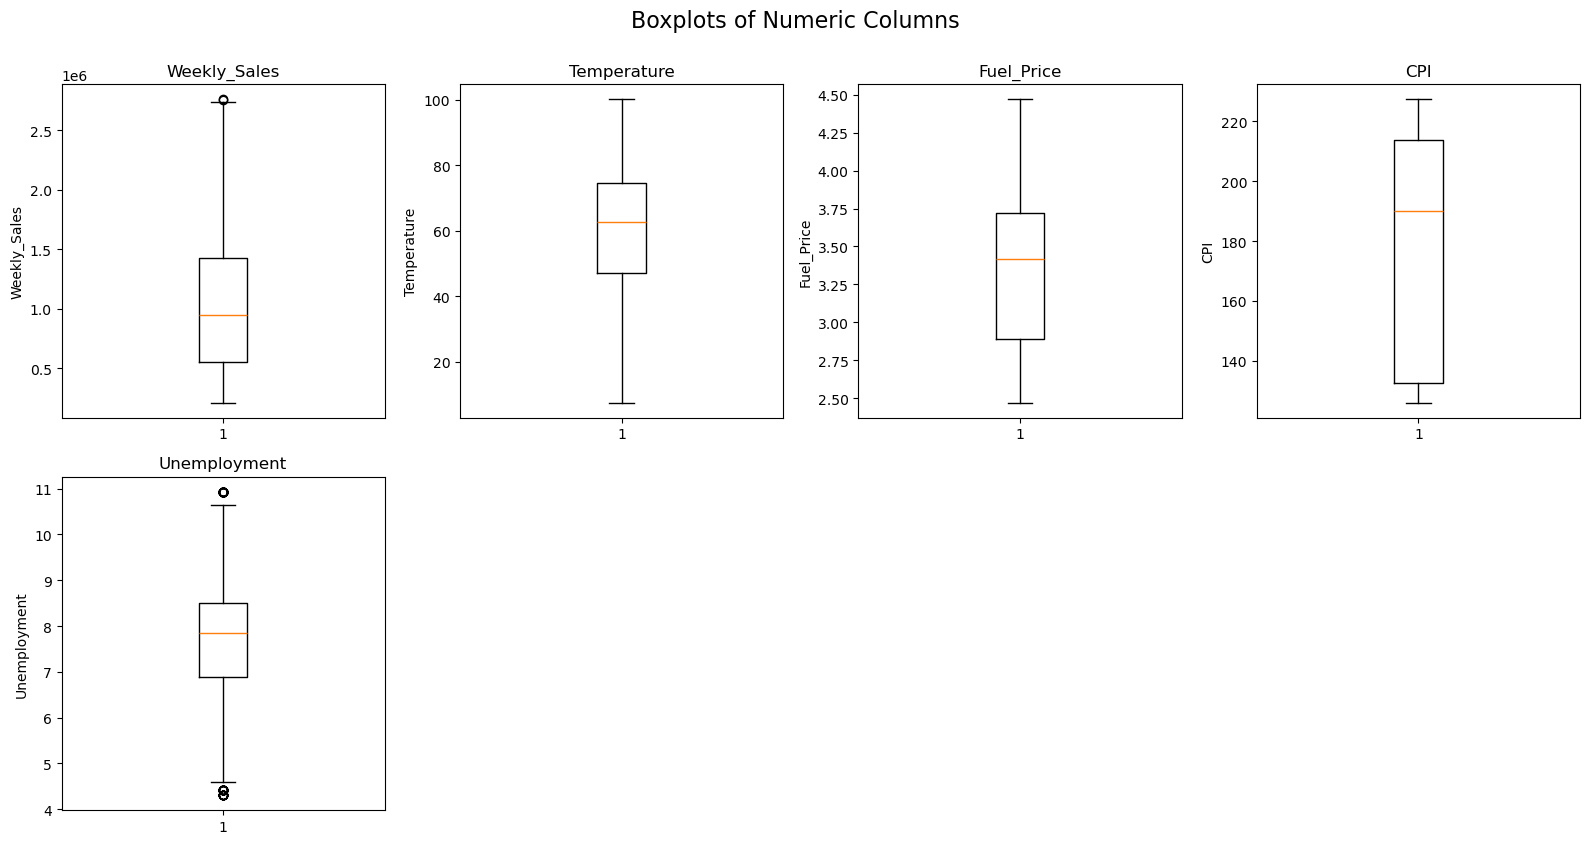

In [16]:
import matplotlib.pyplot as plt

# Only include numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(numeric_cols):
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title(column)
    axes[i].set_ylabel(column)

# Turn off any unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Boxplots of Numeric Columns', fontsize=16, y=1.05)
plt.show()

In [17]:
corr_matrix = df.corr()
corr_matrix

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.045514,0.018273,-0.083900,-0.074845
Temperature,-0.045514,1.000000,0.145398,0.218222,0.025286
Fuel_Price,0.018273,0.145398,1.000000,-0.144404,-0.104773
CPI,-0.083900,0.218222,-0.144404,1.000000,-0.218274
Unemployment,-0.074845,0.025286,-0.104773,-0.218274,1.000000


<Axes: >

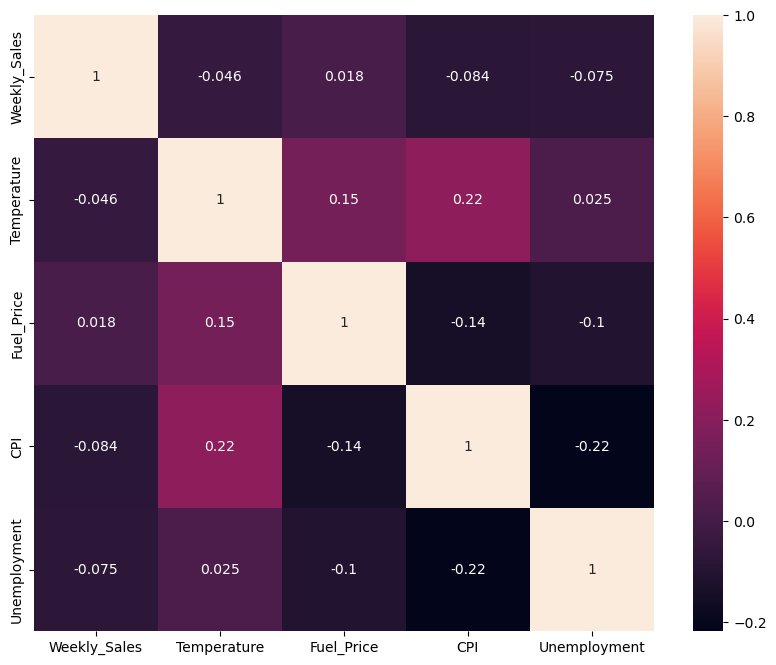

In [18]:
# plot the matrix as a heat map
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

In [19]:
corr = df.corr()['Weekly_Sales'].sort_values(ascending=False)
print(corr)

Weekly_Sales    1.000000
Fuel_Price      0.018273
Temperature    -0.045514
Unemployment   -0.074845
CPI            -0.083900
Name: Weekly_Sales, dtype: float64


In [21]:
# create a Python list of feature names
feature_cols = ['Temperature', 'Fuel_Price', 'Unemployment']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# print the first 5 rows
X.head()

,Temperature,Fuel_Price,Unemployment
0,42.31,2.572,8.106
1,38.51,2.548,8.106
2,39.93,2.514,8.106
3,46.63,2.561,8.106
4,46.50,2.625,8.106


In [22]:
y = df['Weekly_Sales']

# print the first 5 values
y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [23]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(5923, 3)


In [24]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(5923,)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4442, 3)
(4442,)
(1481, 3)
(1481,)


In [27]:
y_test.head()

301      396968.80
2600    2351143.07
4104    1079314.52
5295    1277882.77
1499    1352084.21
Name: Weekly_Sales, dtype: float64

In [28]:
X_test.head()

,Temperature,Fuel_Price,Unemployment
301,78.53,2.705,7.343
2600,28.58,3.231,7.343
4104,46.42,2.788,8.963
5295,58.74,3.498,6.759
1499,48.86,3.129,7.197


In [29]:
# create a model
linreg = LinearRegression()

# fit the model to our training df
linreg.fit(X_train, y_train)

LinearRegression()

In [30]:
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 1398133.077650851
bi = [ -1399.12644009   -724.29201092 -35381.35254061]


In [31]:
list(zip(feature_cols, linreg.coef_))

[('Temperature', -1399.1264400878708),
 ('Fuel_Price', -724.2920109173938),
 ('Unemployment', -35381.352540609485)]

In [32]:
y_predicted = linreg.predict(X_test)

In [33]:
y_predicted

array([1026495.19671552, 1096000.58480017, 1014043.23935405, ...,
        972337.47794074, 1029361.06143405, 1110657.79557811])

In [34]:
from sklearn import metrics

In [35]:
print(metrics.mean_absolute_error(y_test, y_predicted))

471845.158085877


In [36]:
print(metrics.mean_squared_error(y_test, y_predicted))

308746672990.2679


In [37]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

555649.7754793642


In [38]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.0


In [39]:
r2_score(y_test, y_predicted)

0.002998502836012773

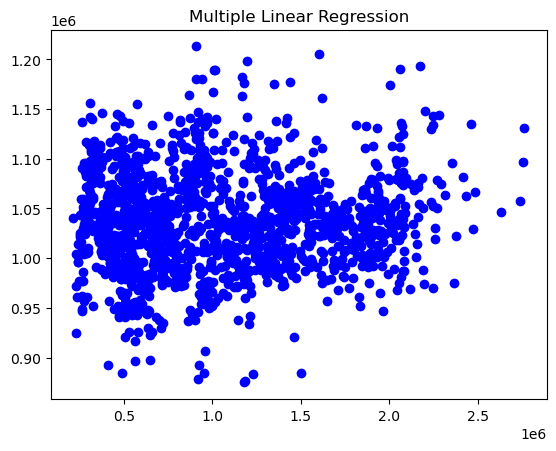

In [40]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

In [41]:
# independent
X = df['Fuel_Price'].values.reshape(-1, 1)
# dependent
y = df['Weekly_Sales'].values.reshape(-1, 1)

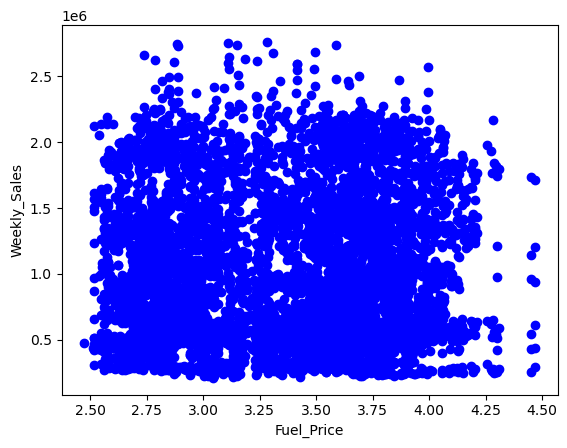

In [42]:
# plot all
plt.ylabel('Weekly_Sales')
plt.xlabel('Fuel_Price')
plt.scatter(X, y, color='blue')
plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

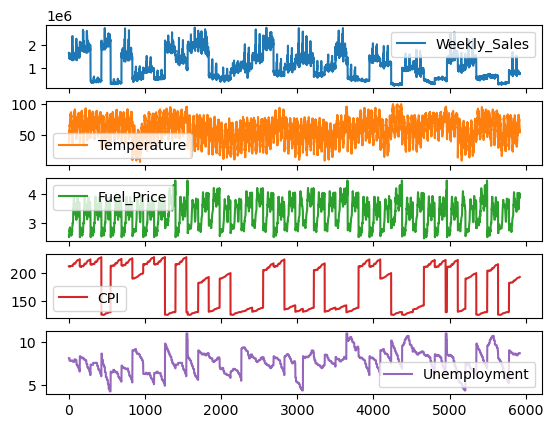

In [43]:
df.plot.line(subplots=True)

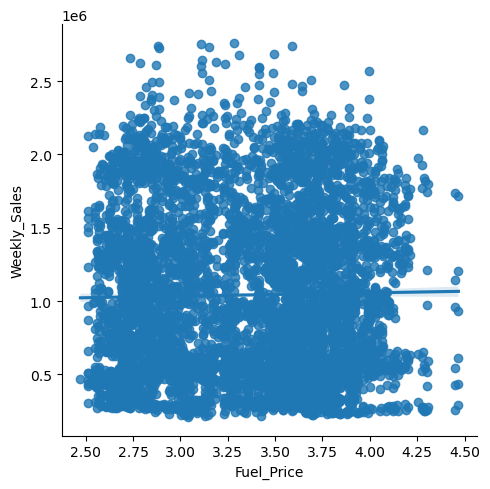

In [44]:
sns.lmplot(x='Fuel_Price',y='Weekly_Sales',data=df,fit_reg=True) 

In [45]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [46]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5034, 1)
(5034, 1)
(889, 1)
(889, 1)


In [47]:
myreg = LinearRegression()

In [48]:
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [49]:
a = myreg.coef_
b = myreg.intercept_

In [50]:
a

array([[15192.82064371]])

In [51]:
b

array([989556.56666711])

In [52]:
y_predicted = myreg.predict(X_test)

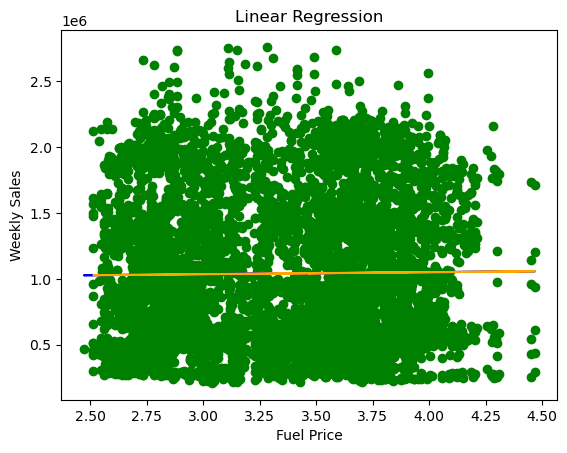

In [53]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

In [54]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

479727.71179765696


In [55]:
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

318638087067.34985


In [56]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

564480.3690717241


In [57]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.0


In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.0010131973046068055